<a href="https://colab.research.google.com/github/ydv1412/Bike-Sharing-Demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [84]:
df = pd.read_csv("/content/drive/MyDrive/capstone project /Supervised_learning_Regression/bike sharing deand prediction/Data _ Resources/SeoulBikeData.csv" , encoding= 'unicode_escape')

In [85]:
df.head(5) 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [86]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


1.Univariate Analysis

Date wise rented bikes count plot

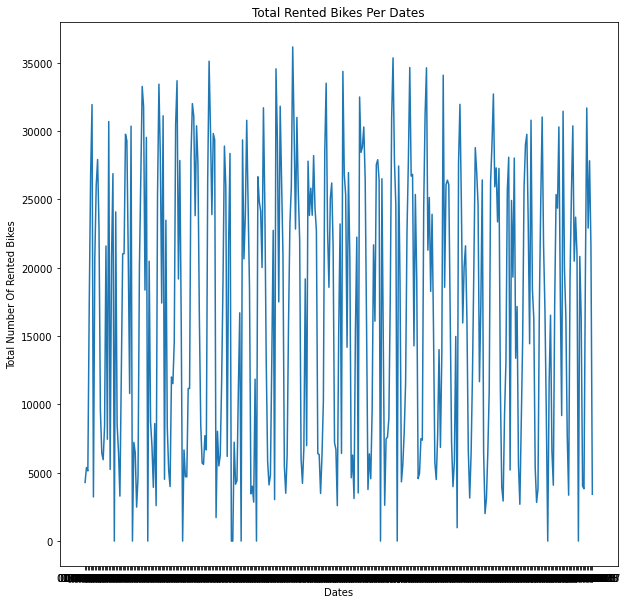

In [87]:
plt.figure(figsize = (10,10))
# df.groupby('Date')['Rented Bike Count'].sum().reset_index().plot( kind = 'line')
df_1 = df.groupby('Date')['Rented Bike Count'].sum().reset_index()
plt.plot(df_1['Date'] ,df_1['Rented Bike Count'])
plt.xlabel('Dates')
plt.ylabel('Total Number Of Rented Bikes')
plt.title('Total Rented Bikes Per Dates')
plt.show()

In [88]:
df_1.sort_values(by = 'Rented Bike Count' , ascending = False).iloc[0:20]

,Date,Rented Bike Count
149,13/06/2018,36149
221,19/06/2018,35349
89,08/06/2018,35103
233,20/06/2018,34639
245,21/06/2018,34621
137,12/06/2018,34544
185,16/06/2018,34360
257,22/06/2018,34079
66,06/07/2018,33676
173,15/06/2018,33492


In [89]:
isinstance(df['Date'][0],str)      ## checking whether date is str object or date object

True

In [90]:
# df_2 = df_1.groupby('Day')['Rented Bike Count'].sum().reset_index()
# df_2.sort_values(by= 'Rented Bike Count',ascending =False)

Hourly booking count plot

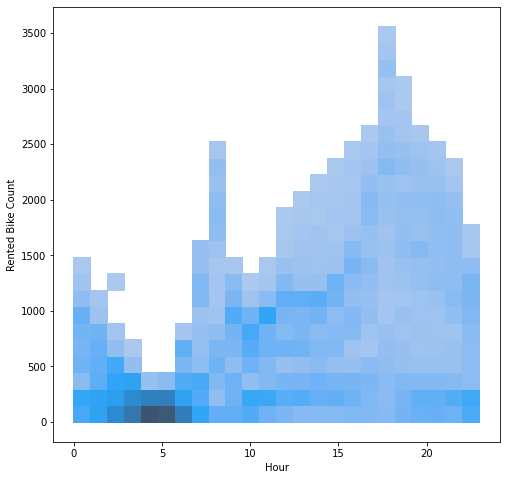

In [91]:
plt.figure(figsize = (8,8))
sns.histplot(data = df , x = 'Hour' , y = 'Rented Bike Count' , bins = 24 , kde=True)

plt.show()

Observation:
* At 8th, 18th and 19th hour rentals are maximum
* From 10th to 18th hour rentals are continuusly increasing and then decreases from 18 to 23

Seasonwise renting count

In [92]:
df_season = df.groupby(by = 'Seasons')['Rented Bike Count'].sum().reset_index()
df_season

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


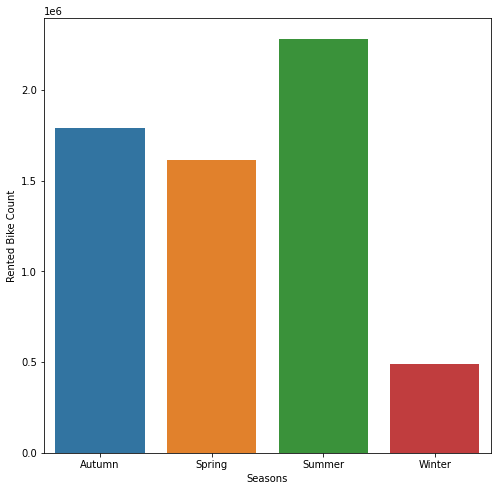

In [93]:
plt.figure(figsize = (8,8))
sns.barplot(data = df_season , x = 'Seasons' , y = 'Rented Bike Count')

plt.show()

Observation:
* 37 percent of total rentals have taken place in summer
* minimum 8% of rentals have taken place in winter

Holiday renting count

In [94]:
df_holiday = df.groupby(by = 'Holiday')['Rented Bike Count'].sum().reset_index()
df_holiday

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


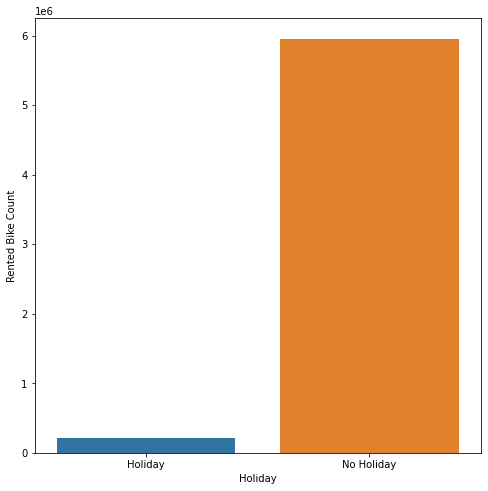

In [95]:
plt.figure(figsize = (8,8))
sns.barplot(data = df_holiday , x = 'Holiday' , y = 'Rented Bike Count')

plt.show()

Observation:
* 97% of rentals have  took place on No holiday

Functioning hour rented count

In [96]:
df_functioning = df.groupby(by = 'Functioning Day')['Rented Bike Count'].sum().reset_index()
df_functioning

,Functioning Day,Rented Bike Count
0,No,0
1,Yes,6172314


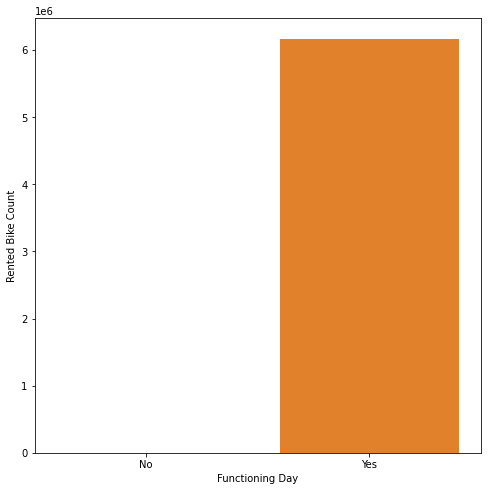

In [97]:
plt.figure(figsize = (8,8))
sns.barplot(data = df_functioning , x = 'Functioning Day' , y = 'Rented Bike Count' )

plt.show()

Observation:
* 100 percent of the rentals have took place on functioning day(hours

In [98]:
# adding a column day of the month in our original data set

df['Day'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x , '%d/%m/%Y').weekday())

In [99]:
day = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' , 'Sunday']
df['day_of_week'] = df['Day'].apply(lambda x: day[x])

In [100]:
df_5 = df.groupby(by = 'day_of_week')['Rented Bike Count'].sum().reset_index().sort_values(by = 'Rented Bike Count' , ascending = False)
df_5.head(5)

,day_of_week,Rented Bike Count
0,Friday,950334
6,Wednesday,923956
1,Monday,911743
2,Saturday,885492
4,Thursday,861999


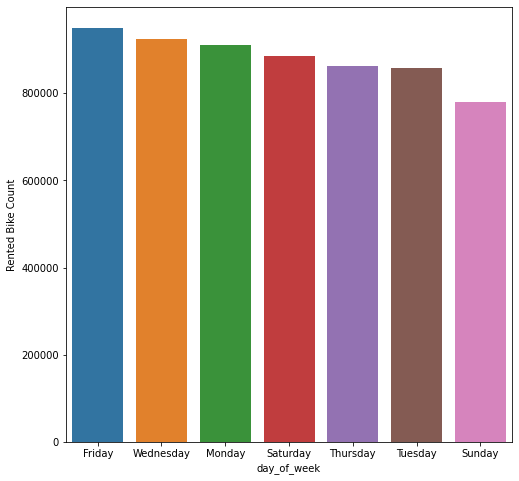

In [101]:
plt.figure(figsize = (8,8))

sns.barplot(x = df_5['day_of_week'] , y = df_5['Rented Bike Count'])

plt.show()

In [148]:
plt.figure(figsize = (10,8))

corr_matrix = df.corr()
sns.heatmap(corr_matrix , annot = True, cmap = 'YlGnBu')

plt.show()

Observation:
* Bike Counts increases as Temperature increases.
* Bike Count is also proportional to Hour to a little extent
* bike count increases as Dew Point temperature increases
* bike count is also proportional to visibility,wind speed and solar radiation but very weak proportionality.
*Bike count also decreases as snowfall,rainfall and humidity increases with a very weak inverse propportionality
* Bike count is not at all dependent on the day of week

Feature Engineering

In [103]:
df['Day'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').weekday())   ## adding date , month ,year columns 
df['Year'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').year)
df['Month'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').month)
df['Date_1'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').day)

In [104]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,day_of_week,Year,Month,Date_1
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1


Converting categorical features to numerical via one hot encoding

In [105]:
different_seasons = pd.get_dummies(df['Seasons'])  
different_seasons.head(5)

,Autumn,Spring,Summer,Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [106]:
df = pd.merge(df,different_seasons , how = 'left' , left_index = True , right_index = True)

In [107]:
different_holiday = pd.get_dummies(df['Holiday'])
df = pd.merge(df,different_holiday , how = 'left' , left_index = True , right_index = True)
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday_x,Functioning Day,Day,day_of_week,Year,Month,Date_1,Autumn,Spring,Summer,Winter,Holiday_y,No Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1,0,0,0,1,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1,0,0,0,1,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1,0,0,0,1,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1,0,0,0,1,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1,0,0,0,1,0,1


In [108]:
different_Functioning_Day = pd.get_dummies(df['Functioning Day'])
df = pd.merge(df,different_Functioning_Day , how = 'left' , left_index = True , right_index = True)
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday_x,Functioning Day,Day,day_of_week,Year,Month,Date_1,Autumn,Spring,Summer,Winter,Holiday_y,No Holiday,No,Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1,0,0,0,1,0,1,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1,0,0,0,1,0,1,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1,0,0,0,1,0,1,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1,0,0,0,1,0,1,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,2017,12,1,0,0,0,1,0,1,0,1


In [109]:
df_final = df.drop(['Date' , 'Seasons' , 'Holiday_x' ,'Functioning Day' , 'day_of_week'] , axis = 1)

In [110]:

df_final.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Year,Month,Date_1,Autumn,Spring,Summer,Winter,Holiday_y,No Holiday,No,Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,2017,12,1,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,2017,12,1,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,2017,12,1,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,2017,12,1,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,2017,12,1,0,0,0,1,0,1,0,1


Dropping the duplicate values, if any

In [111]:
df_final.drop_duplicates(keep = 'first' , inplace = True)

column standardisation

In [112]:
list1 = ['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Year', 'Month', 'Date_1', 'Autumn', 'Spring', 'Summer', 'Winter',
       'Holiday_y', 'No Holiday', 'No', 'Yes']

for column in list1:
  df_final[column] = df_final[column].apply(lambda x :( (x-df_final[column].mean())/(df_final[column].max()-df_final[column].min())))


In [113]:
df_final.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Year,Month,Date_1,Autumn,Spring,Summer,Winter,Holiday_y,No Holiday,No,Yes
0,254,-0.500000,-0.316135,-0.216594,0.064202,0.285441,-0.374979,-0.161679,-0.004248,-0.008531,0.16621,-0.915068,0.497634,-0.490685,-0.249315,-0.252055,-0.252055,0.753425,-0.049315,0.049315,-0.033676,0.033676
1,204,-0.456522,-0.321380,-0.206390,-0.124988,0.285441,-0.374979,-0.161679,-0.004248,-0.008531,0.16621,-0.915068,0.497634,-0.490685,-0.249315,-0.252055,-0.252055,0.753425,-0.049315,0.049315,-0.033676,0.033676
2,173,-0.413043,-0.330121,-0.196186,-0.097961,0.285441,-0.376710,-0.161679,-0.004248,-0.008531,0.16621,-0.915068,0.497634,-0.490685,-0.249315,-0.252055,-0.252055,0.753425,-0.049315,0.049315,-0.033676,0.033676
3,107,-0.369565,-0.333618,-0.185982,-0.111474,0.285441,-0.374979,-0.161679,-0.004248,-0.008531,0.16621,-0.915068,0.497634,-0.490685,-0.249315,-0.252055,-0.252055,0.753425,-0.049315,0.049315,-0.033676,0.033676
4,78,-0.326087,-0.330121,-0.226799,0.077715,0.285441,-0.392280,-0.161679,-0.004248,-0.008531,0.16621,-0.915068,0.497634,-0.490685,-0.249315,-0.252055,-0.252055,0.753425,-0.049315,0.049315,-0.033676,0.033676


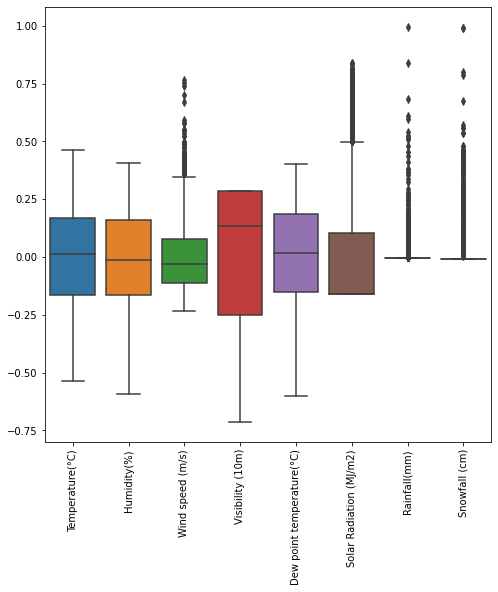

In [114]:
columns = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)' , 'Solar Radiation (MJ/m2)' , 'Rainfall(mm)' , 'Snowfall (cm)']

plt.figure(figsize = (8,8))
sns.boxplot(data = df_final[columns])

plt.xticks(rotation  = 90)
plt.show()

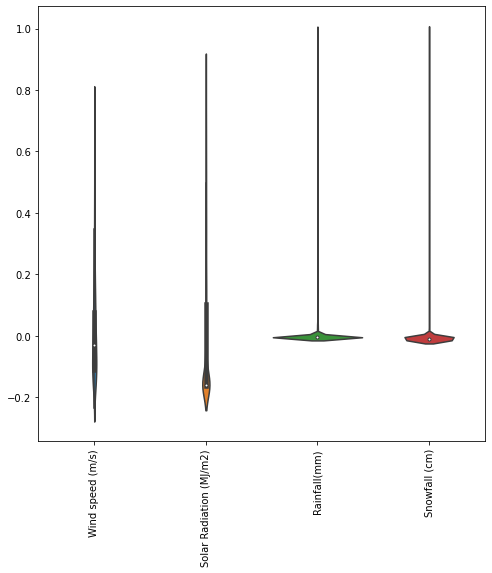

In [115]:
columns = ['Wind speed (m/s)' , 'Solar Radiation (MJ/m2)' , 'Rainfall(mm)' , 'Snowfall (cm)']

plt.figure(figsize = (8,8))
sns.violinplot(data = df_final[columns])

plt.xticks(rotation  = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


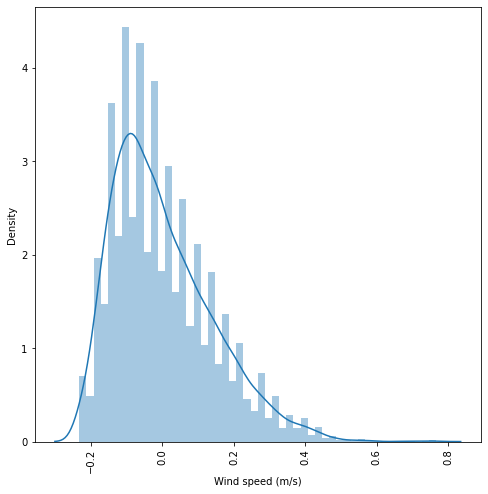

In [116]:

plt.figure(figsize = (8,8))
sns.distplot(df_final['Wind speed (m/s)'])
plt.xticks(rotation  = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


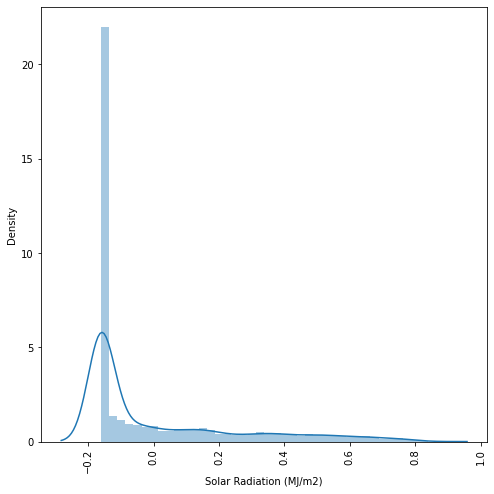

In [117]:
plt.figure(figsize = (8,8))
sns.distplot(df_final['Solar Radiation (MJ/m2)'])
plt.xticks(rotation  = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


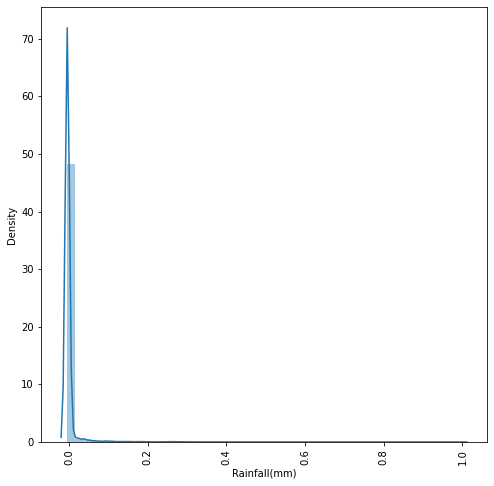

In [118]:
plt.figure(figsize = (8,8))
sns.distplot(df_final['Rainfall(mm)'])
plt.xticks(rotation  = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


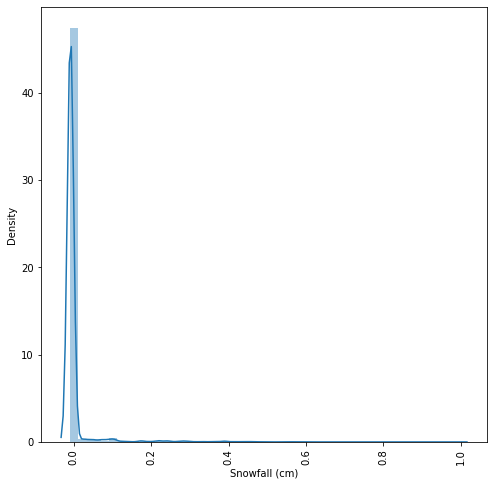

In [119]:
plt.figure(figsize = (8,8))
sns.distplot(df_final['Snowfall (cm)'])
plt.xticks(rotation  = 90)
plt.show()

In [120]:
columns = ['Wind speed (m/s)' , 'Solar Radiation (MJ/m2)' , 'Rainfall(mm)' , 'Snowfall (cm)']

df_final[columns].describe()

,Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03
mean,-9.791278e-16,-2.104538e-15,-1.202383e-16,1.808536e-16
std,1.400405e-01,2.468029e-01,3.223408e-02,4.963025e-02
min,-2.330958e-01,-1.616792e-01,-4.248206e-03,-8.530511e-03
25%,-1.114741e-01,-1.616792e-01,-4.248206e-03,-8.530511e-03
50%,-3.039306e-02,-1.588383e-01,-4.248206e-03,-8.530511e-03
75%,7.771504e-02,1.025254e-01,-4.248206e-03,-8.530511e-03
max,7.669042e-01,8.383208e-01,9.957518e-01,9.914695e-01


Observation-
* columns Wind speed, Solar Radiation ,Rainfall , Snowfall are positively skewed 
* These columns have a huge gap between 75th percentile and max values



Removing outliers

In [121]:
for colmn in columns:
  Q3 = df_final[colmn].quantile(0.75)
  Q1 = df_final[colmn].quantile(0.25)
  IQR = Q3-Q1
  df_final = df_final[(df_final[colmn]>= Q1-IQR) & (df_final[colmn]<= Q3+IQR)]

In [122]:
df_final.shape

(6283, 22)

KNN NEIGHBOURHOOD

In [124]:
x , y = df_final[list1] , df_final['Rented Bike Count']

In [125]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.20 , shuffle = False)

In [126]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5026, 21)
(1257, 21)
(5026,)
(1257,)


In [123]:
k_regressor = KNeighborsRegressor(n_neighbors = 5 ,  weights = 'distance')

In [127]:
s = k_regressor.fit(x_train , y_train)

In [128]:
predicted_y = s.predict(x_test)

In [143]:
accuracy = mean_squared_error(predicted_y , y_test , squared = False)

In [142]:
accuracy

250885.31670357447

In [146]:
for i in range(1,50,2):
  k_regressor = KNeighborsRegressor(n_neighbors = i ,  weights = 'distance')
  s = k_regressor.fit(x_train , y_train)
  predicted_y = s.predict(x_test)
  error = mean_squared_error(predicted_y , y_test , squared = False)
  print("for k = {} the mean_squared_error is{}".format(i , error))


for k = 1 the mean_squared_error is616.7082838738004
for k = 3 the mean_squared_error is517.4934539967122
for k = 5 the mean_squared_error is500.8845343026419
for k = 7 the mean_squared_error is486.0746234203714
for k = 9 the mean_squared_error is481.9742910531212
for k = 11 the mean_squared_error is481.3896135849331
for k = 13 the mean_squared_error is483.3024024586449
for k = 15 the mean_squared_error is489.1911017531645
for k = 17 the mean_squared_error is491.68519219454504
for k = 19 the mean_squared_error is492.92432803078816
for k = 21 the mean_squared_error is494.2282815086369
for k = 23 the mean_squared_error is494.40552633224127
for k = 25 the mean_squared_error is497.56752414603955
for k = 27 the mean_squared_error is500.0226687547661
for k = 29 the mean_squared_error is502.1388391445154
for k = 31 the mean_squared_error is503.36693477545464
for k = 33 the mean_squared_error is503.9870011478924
for k = 35 the mean_squared_error is506.2538631317125
for k = 37 the mean_squared_

In [147]:
for i in range(1,50,2):
  k_regressor = KNeighborsRegressor(n_neighbors = i)
  s = k_regressor.fit(x_train , y_train)
  predicted_y = s.predict(x_test)
  error = mean_squared_error(predicted_y , y_test , squared = False)
  print("for k = {} the mean_squared_error is{}".format(i , error))

for k = 1 the mean_squared_error is616.7082838738004
for k = 3 the mean_squared_error is517.2250379252748
for k = 5 the mean_squared_error is501.3029873155432
for k = 7 the mean_squared_error is486.49824703055975
for k = 9 the mean_squared_error is482.8654768169809
for k = 11 the mean_squared_error is482.4790861117309
for k = 13 the mean_squared_error is484.84275744986826
for k = 15 the mean_squared_error is491.3641743872853
for k = 17 the mean_squared_error is494.07737981302074
for k = 19 the mean_squared_error is495.2972255961563
for k = 21 the mean_squared_error is496.5139846679365
for k = 23 the mean_squared_error is496.7956567353005
for k = 25 the mean_squared_error is500.374937572334
for k = 27 the mean_squared_error is503.11779546260266
for k = 29 the mean_squared_error is505.45088683454924
for k = 31 the mean_squared_error is506.7865702534656
for k = 33 the mean_squared_error is507.40010521640215
for k = 35 the mean_squared_error is509.91733322073424
for k = 37 the mean_squared

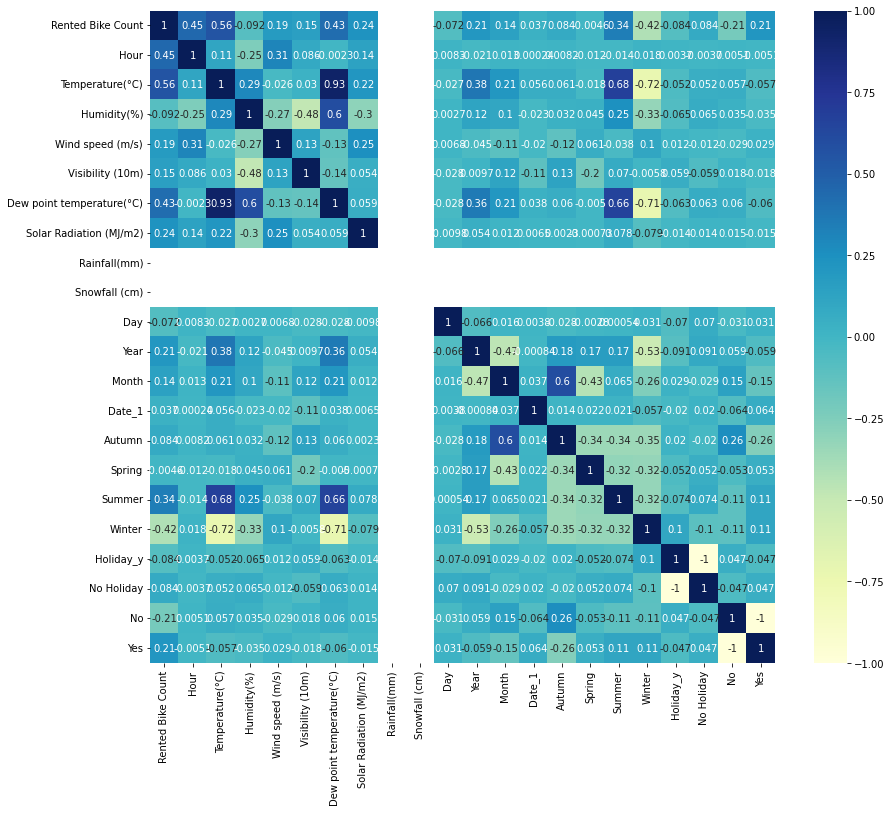

In [152]:
plt.figure(figsize = (14,12))

corr_matrix = df_final.corr()
sns.heatmap(corr_matrix , annot = True, cmap = 'YlGnBu')

plt.show()

In [156]:
list1 = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Dew point temperature(°C)','Summer', 'Winter','No', 'Yes' ]
x2 = df[list1]
y2 = df['Rented Bike Count']
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(x2 , y2 , test_size = 0.3 , shuffle = False)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)


for i in range(1,50,2):
  k_regressor = KNeighborsRegressor(n_neighbors = i)
  s = k_regressor.fit(x_train2 , y_train2)
  predicted_y2 = s.predict(x_test2)
  error = mean_squared_error(predicted_y2 , y_test2 , squared = False)
  print("for k = {} the mean_squared_error is{}".format(i , error))

(6132, 8)
(2628, 8)
(6132,)
(2628,)
for k = 1 the mean_squared_error is586.0116413823333
for k = 3 the mean_squared_error is542.5818959150164
for k = 5 the mean_squared_error is523.1259950936965
for k = 7 the mean_squared_error is518.8729099000534
for k = 9 the mean_squared_error is516.345402865757
for k = 11 the mean_squared_error is519.1646701521021
for k = 13 the mean_squared_error is518.7580429318141
for k = 15 the mean_squared_error is518.2259369898264
for k = 17 the mean_squared_error is519.1129942327698
for k = 19 the mean_squared_error is520.0228489984249
for k = 21 the mean_squared_error is519.4299681052378
for k = 23 the mean_squared_error is519.3903998392964
for k = 25 the mean_squared_error is519.7995737317898
for k = 27 the mean_squared_error is520.8517393008309
for k = 29 the mean_squared_error is521.4215979700655
for k = 31 the mean_squared_error is520.8621447691299
for k = 33 the mean_squared_error is521.4785235813215
for k = 35 the mean_squared_error is522.158362629541